In [1]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd

from multiprocessing import Pool
import pickle

from IPython.display import display, Markdown

In [2]:
module_path = Path.cwd().parent
if module_path not in sys.path:
    sys.path.append(str(module_path))

In [3]:
from src.tsp_problem import TSPProblem
from src.algorithms.methods import Method
from src.visualization import Visualizer

In [4]:
problem = TSPProblem(no_runs=200)

Loaded 4 instances: TSPA, TSPB, TSPC, TSPD
Available methods: ['RANDOM', 'NEAREST', 'GREEDY_CYCLE', 'GREEDY_REGRET', 'GREEDY_REGRET_WEIGHTED', 'LOCAL_SEARCH_STEEPEST_NODES_RANDOM', 'LOCAL_SEARCH_STEEPEST_NODES_HEURISTIC', 'LOCAL_SEARCH_STEEPEST_EDGES_RANDOM', 'LOCAL_SEARCH_STEEPEST_EDGES_HEURISTIC', 'LOCAL_SEARCH_GREEDY_NODES_RANDOM', 'LOCAL_SEARCH_GREEDY_NODES_HEURISTIC', 'LOCAL_SEARCH_GREEDY_EDGES_RANDOM', 'LOCAL_SEARCH_GREEDY_EDGES_HEURISTIC', 'LOCAL_SEARCH_CANDIDATES_RANDOM', 'LOCAL_SEARCH_CANDIDATES_HEURISTIC']


In [5]:
# grades = problem.run(
#     ["TSPC", "TSPD"],
#     [
#         Method.RANDOM_SEQUENCE,
#         Method.GREEDY_REGRET_WEIGHTED,
#         Method.LOCAL_SEARCH_CANDIDATES_RANDOM,
#         Method.LOCAL_SEARCH_CANDIDATES_HEURISTIC,
#     ],
# )

In [6]:
# pickle.dump(grades, open("grades.pkl", "wb"))

In [7]:
grades = pickle.load(open("grades.pkl", "rb"))

In [8]:
for instance_name, instance_grades in grades.items():
    print(f"\n{instance_name}:")
    print("----")
    for method_name, grade in instance_grades.items():
        meth_name = method_name.value.replace("_", " ").title()
        print(f"{meth_name}: {grade}")


TSPC:
----
Random: 
==================================== Grade =====================================
Method:                                 Random
Best run id:                            84
Best run cost:                          48726
Best run distance:                      146547
Best run score:                         195273
Min score:                              195273
Avg score:                              215055
Max score:                              245849

Greedy Regret Weighted: 
==================================== Grade =====================================
Method:                                 Greedy Regret Weighted
Best run id:                            21
Best run cost:                          35047
Best run distance:                      19079
Best run score:                         54126
Min score:                              54126
Avg score:                              55930
Max score:                              58342

Local Search Candidates Random: 
====

In [9]:
nodes = {
    instance_name: problem._get_nodes(instance)
    for instance_name, instance in problem.instances.items()
    if instance_name in ("TSPC", "TSPD")
}
visualizer = Visualizer(nodes)

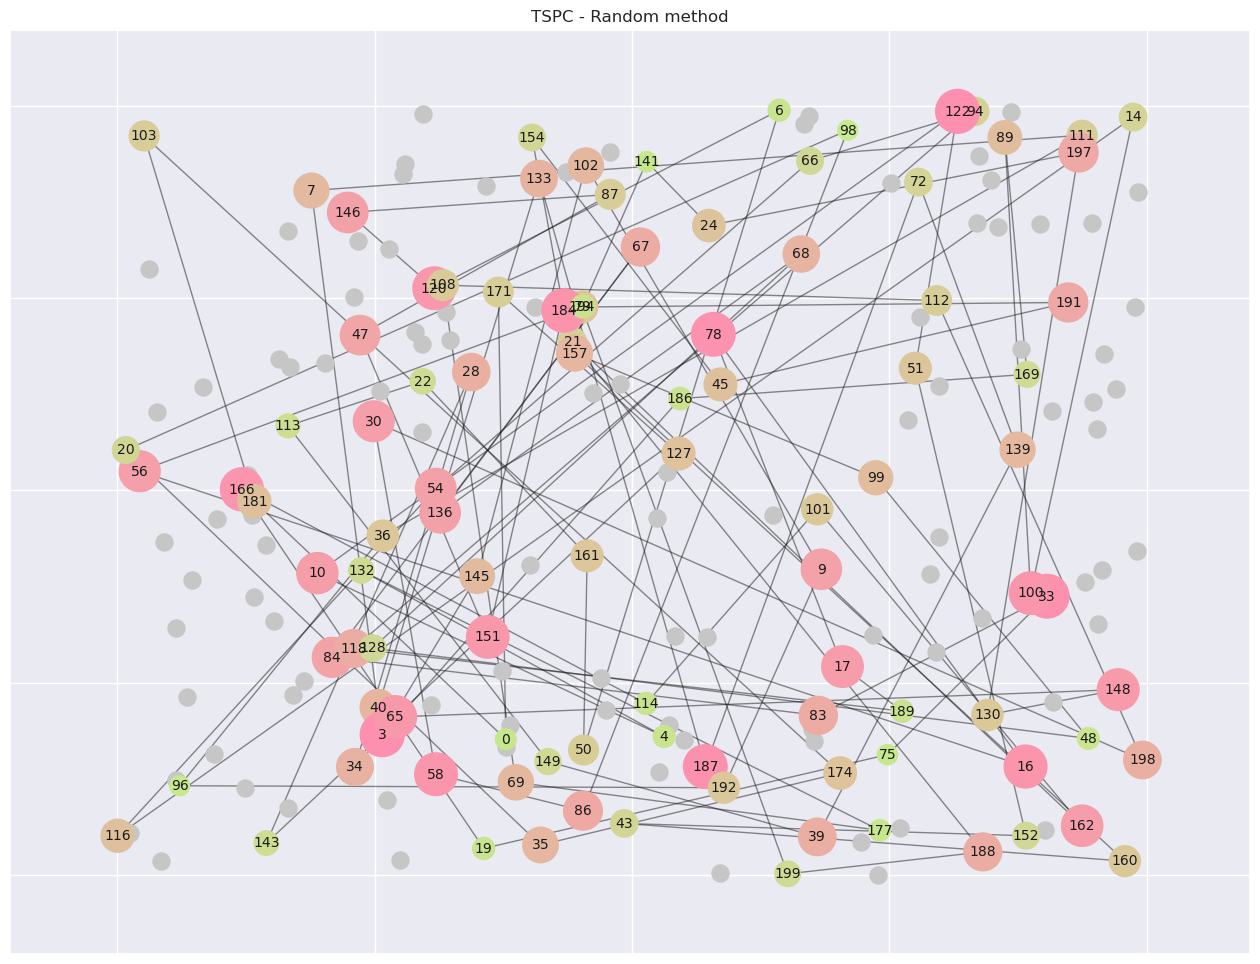

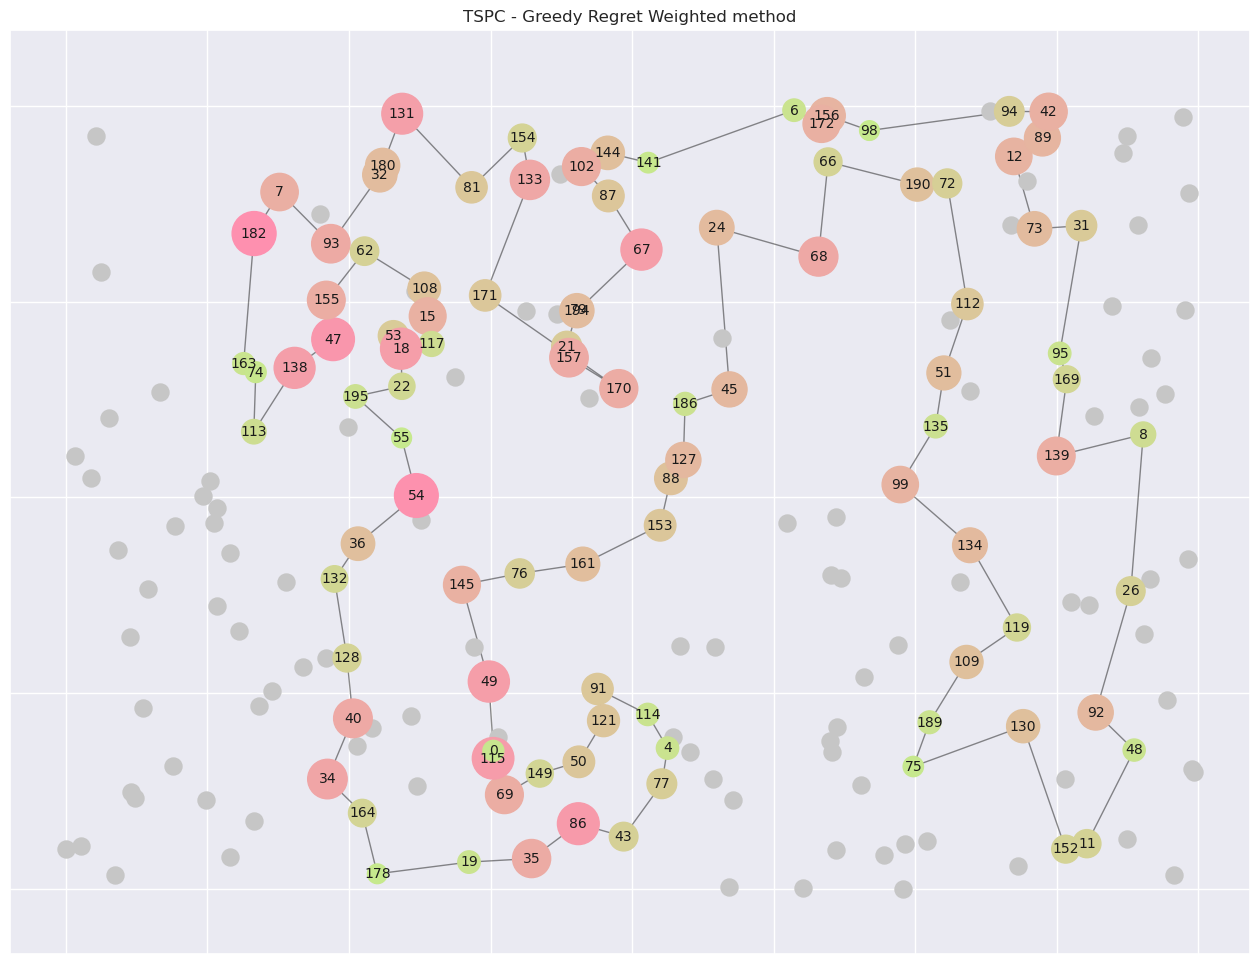

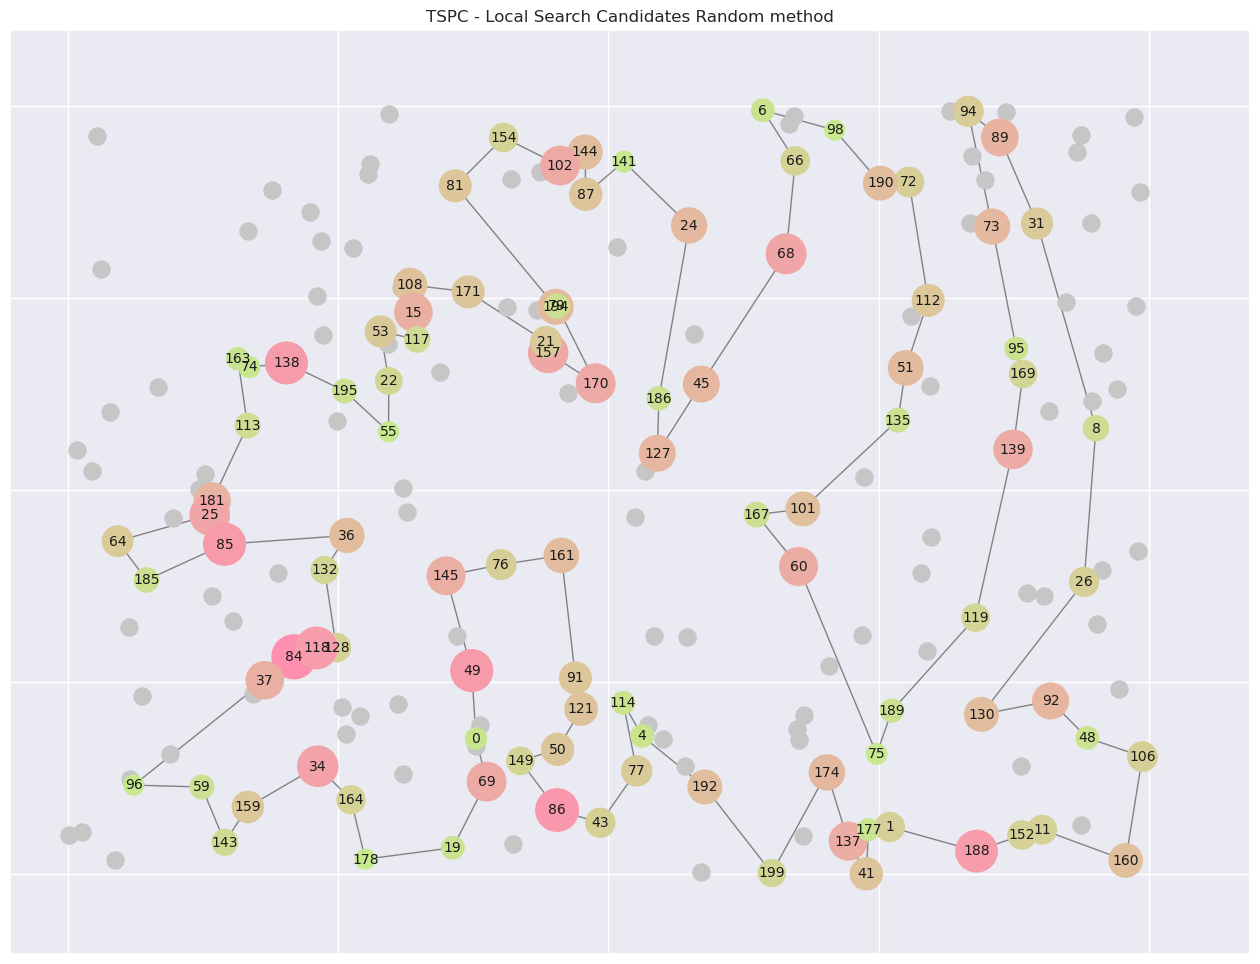

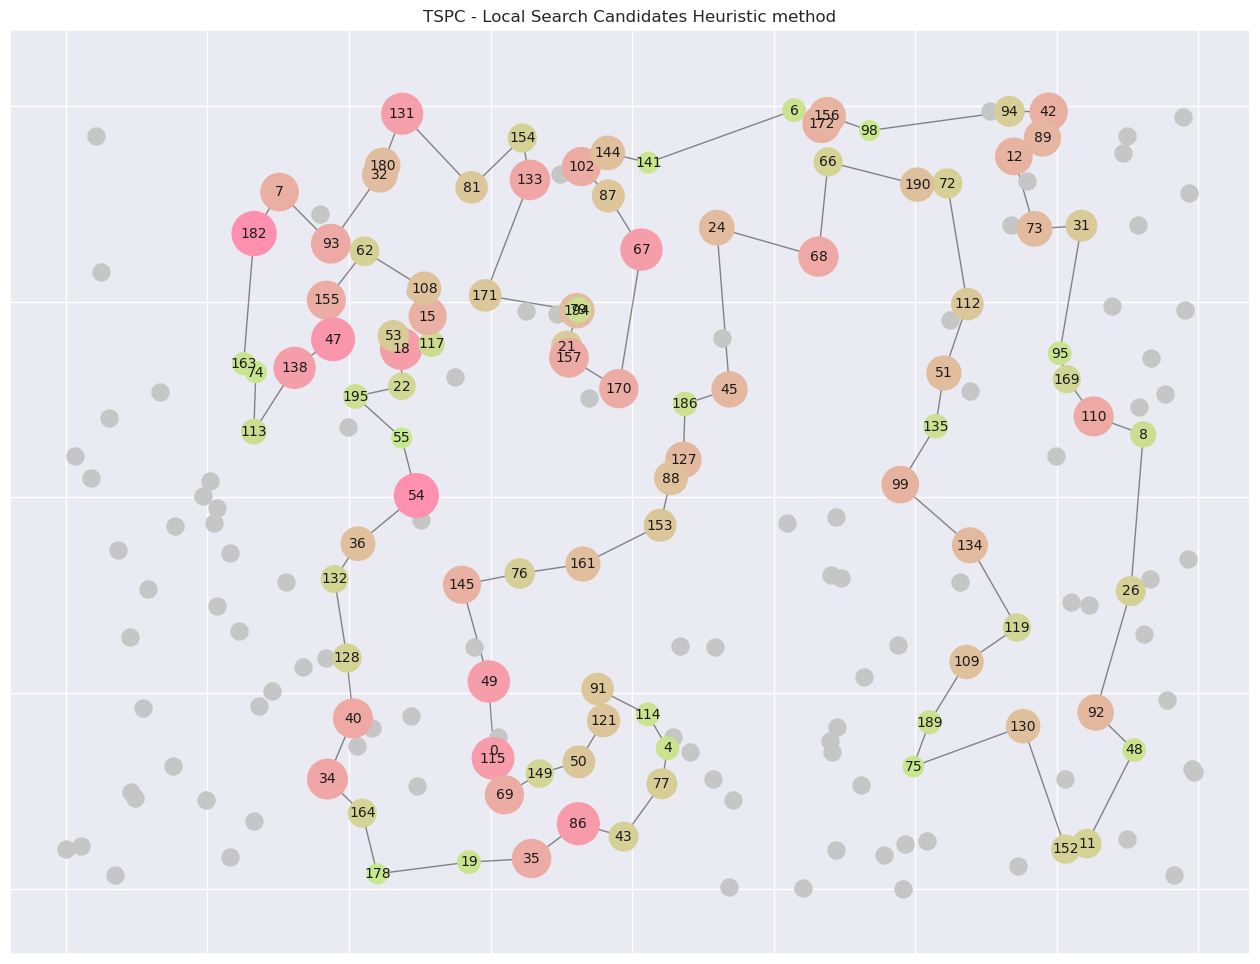

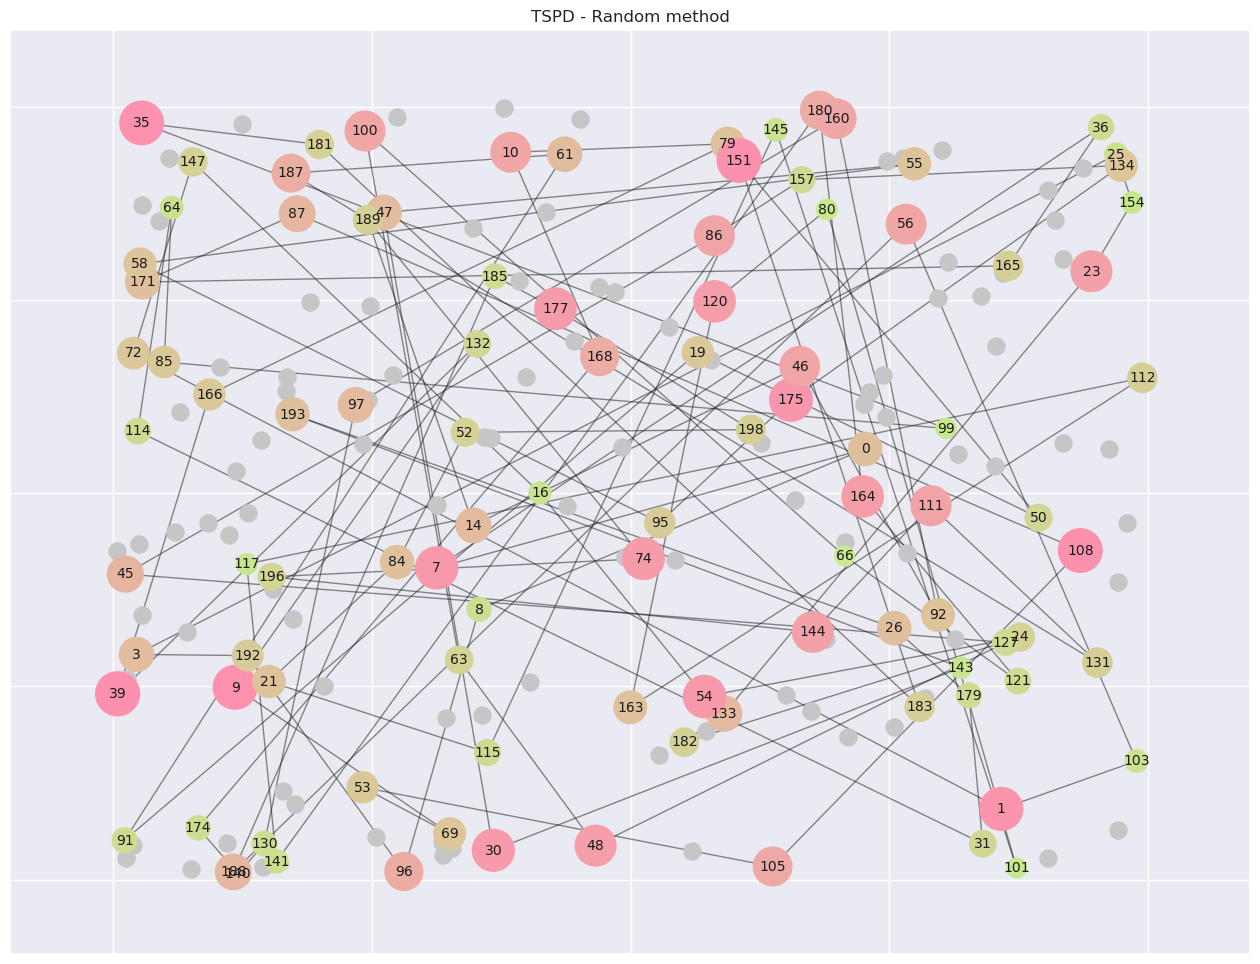

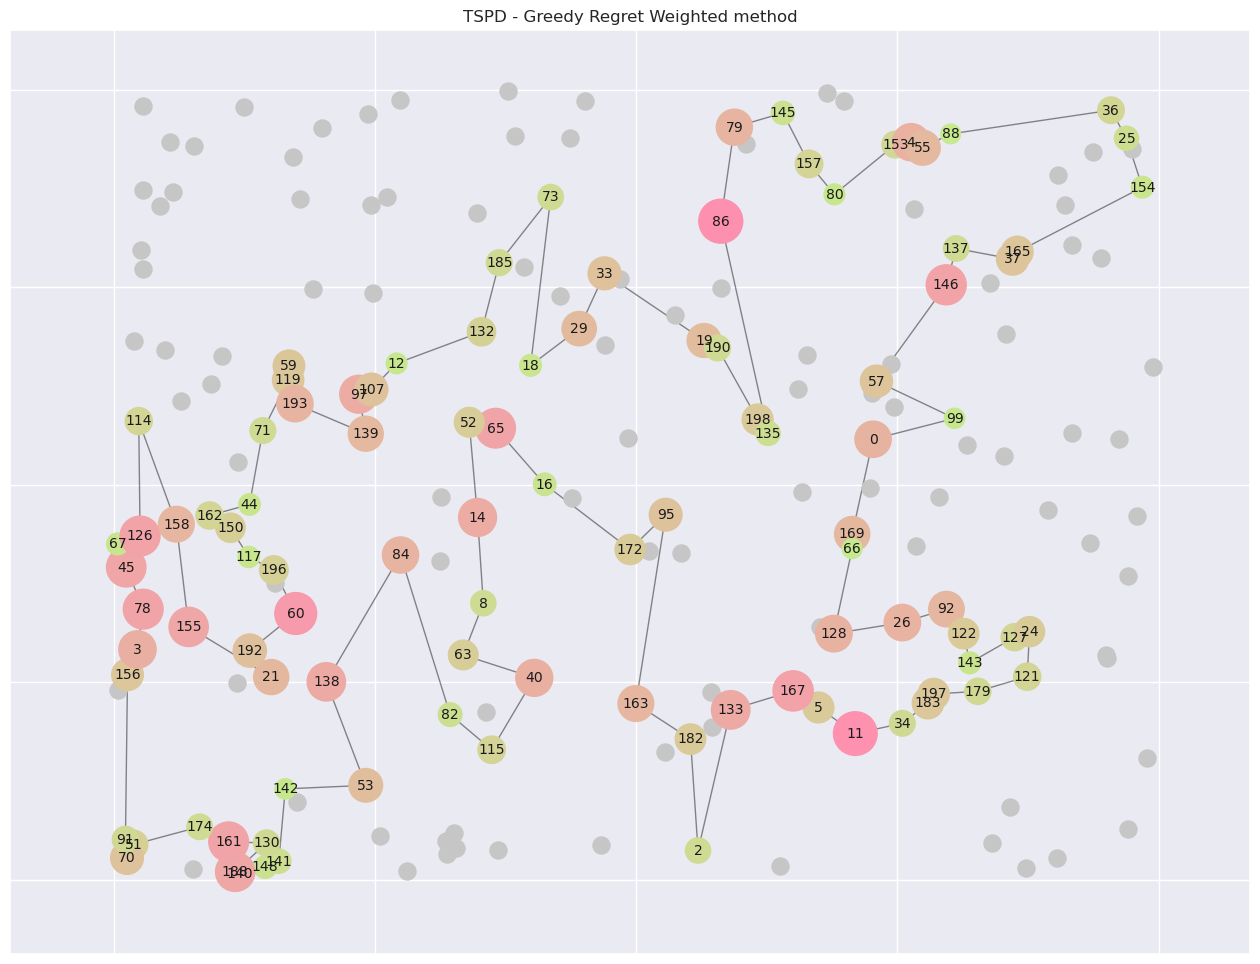

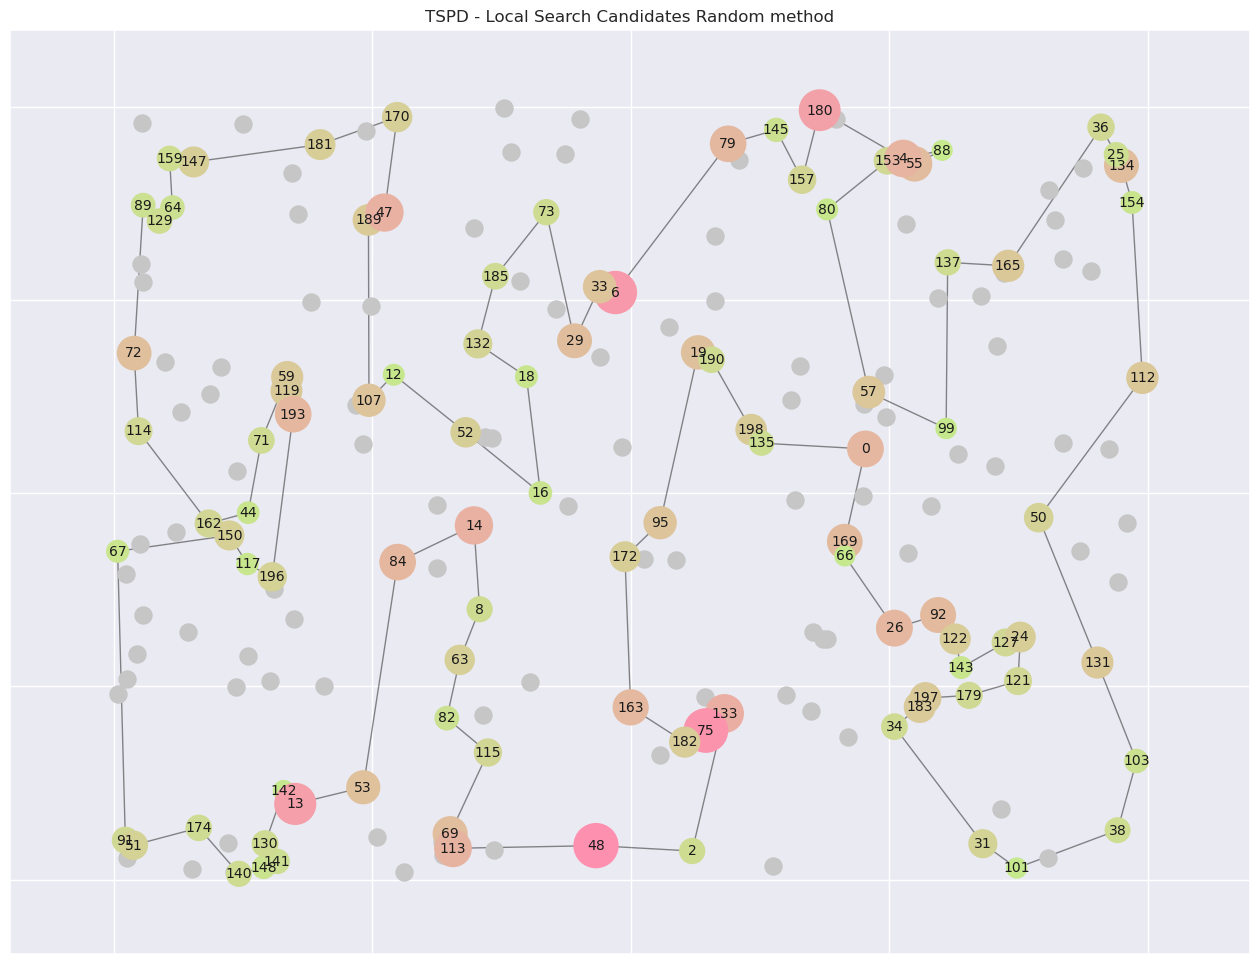

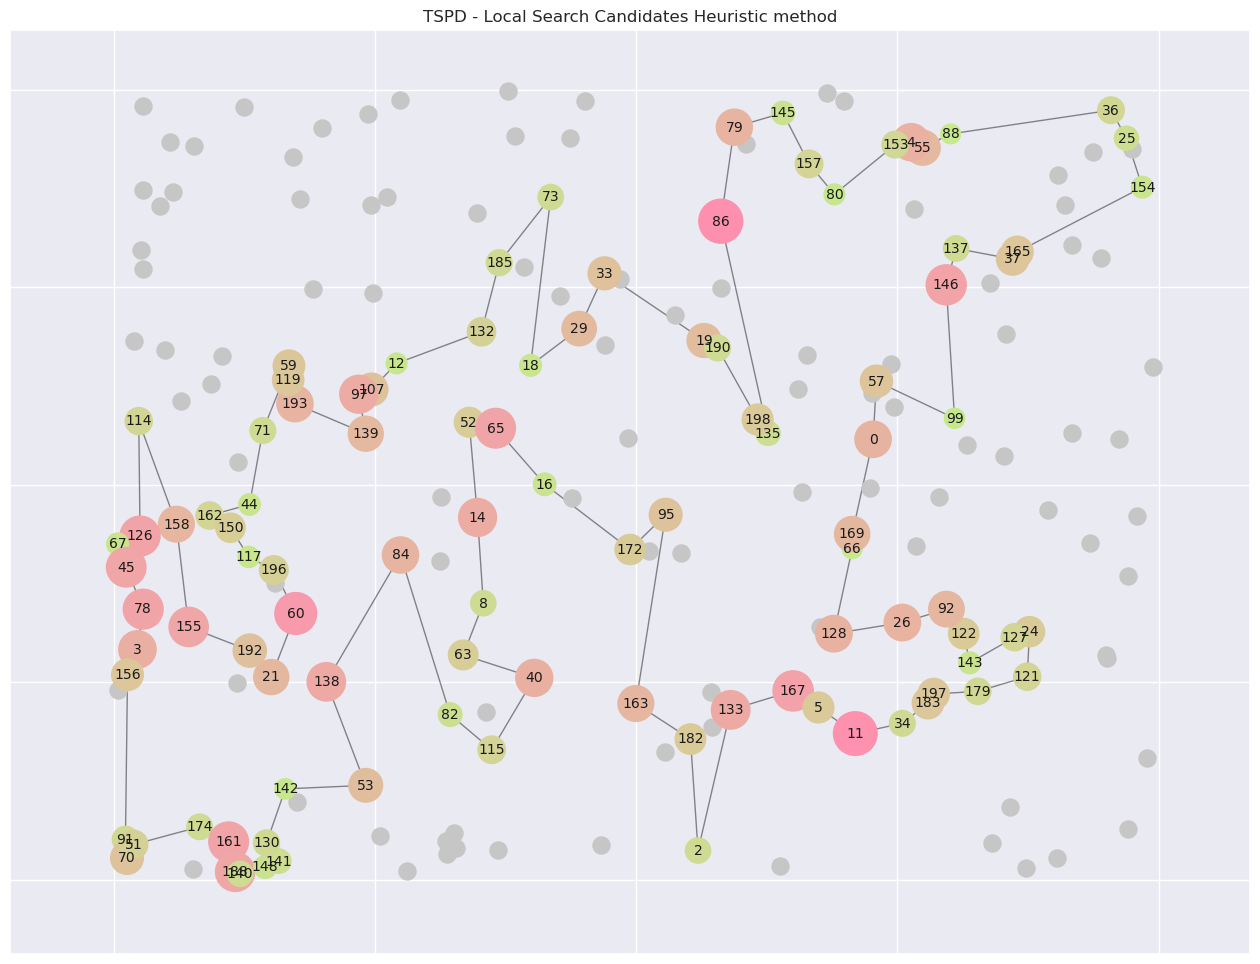

In [10]:
for instance_name, instance_grades in grades.items():
    for method_name, grade in instance_grades.items():
        visualizer.visualise_solution(grade, instance_name, method_name)

In [11]:
res = {}
for instance_name, instance_grades in grades.items():
    res[instance_name] = {}
    for method_name, grade in instance_grades.items():
        meth_name = method_name.value.replace("_", " ").title()
        res[instance_name][meth_name] = [grade.avg, grade.min, grade.max, *grade.runtime]

In [12]:
dfs = {}
for instance, methods in res.items():
    df = (
        pd.DataFrame.from_dict(
            methods,
            orient="index",
            columns=["Average Score", "Min Score", "Max Score", "Total runtime", "Per run runtime"],
        )
        .reset_index()
        .sort_values(by="Min Score")
        .reset_index(drop=True)
    )
    df.columns = [
        "Method",
        "Average Score",
        "Min Score",
        "Max Score",
        "Total runtime",
        "Per run runtime",
    ]
    df.index.name = instance
    dfs[instance] = df

In [13]:
for df in dfs.values():
    display(Markdown(df.to_markdown()))

|   TSPC | Method                            |   Average Score |   Min Score |   Max Score |   Total runtime |   Per run runtime |
|-------:|:----------------------------------|----------------:|------------:|------------:|----------------:|------------------:|
|      0 | Local Search Candidates Random    |           52704 |       52704 |       52704 |        114.266  |            0.5713 |
|      1 | Local Search Candidates Heuristic |           53867 |       53867 |       53867 |          3.8769 |            0.0194 |
|      2 | Greedy Regret Weighted            |           55930 |       54126 |       58342 |         83.3534 |            0.4168 |
|      3 | Random                            |          215055 |      195273 |      245849 |          0.2533 |            0.0013 |

|   TSPD | Method                            |   Average Score |   Min Score |   Max Score |   Total runtime |   Per run runtime |
|-------:|:----------------------------------|----------------:|------------:|------------:|----------------:|------------------:|
|      0 | Local Search Candidates Random    |           48478 |       48478 |       48478 |        128.027  |            0.6401 |
|      1 | Local Search Candidates Heuristic |           48690 |       48690 |       48690 |          7.0193 |            0.0351 |
|      2 | Greedy Regret Weighted            |           53783 |       49165 |       59081 |         82.686  |            0.4134 |
|      3 | Random                            |          217756 |      193542 |      238962 |          0.292  |            0.0015 |